# Mall Customer Segmentation Analysis

In [17]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read dataset

path = 'data/mall_customers_data.csv'
df = pd.read_csv(path)

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Data Visualization

In [23]:
plt.style.use('fivethirtyeight')

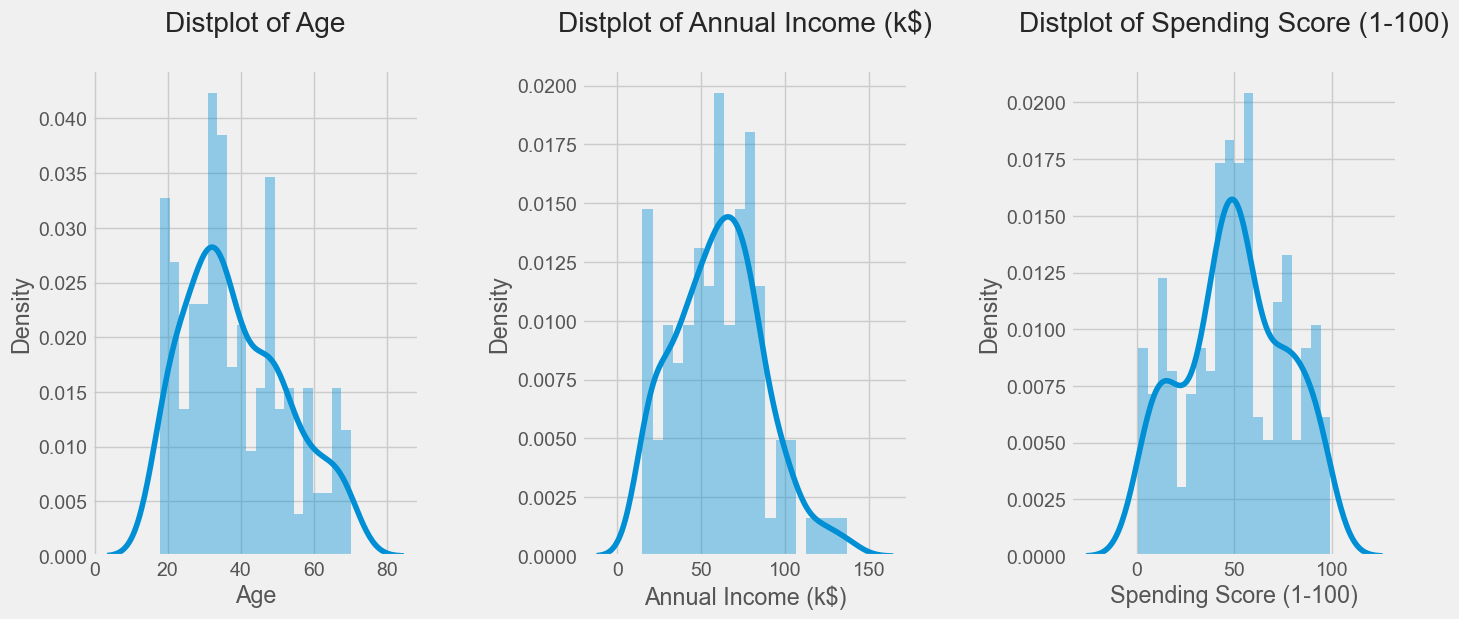

In [67]:
# Plotting Histograms

plt.figure(figsize=(15,6))
n = 0

for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[x], bins = 20)
    plt.title(f'Distplot of {x}\n')
plt.show()

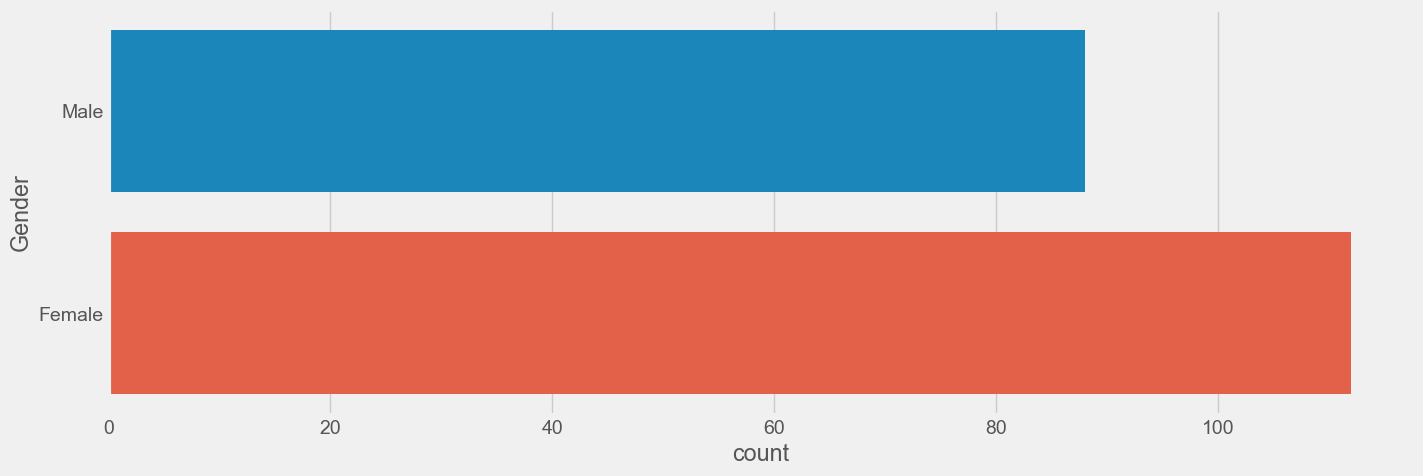

In [45]:
# Plotting Gender count

plt.figure(figsize=(15,5))
sns.countplot(y = 'Gender', data = df)
plt.show()

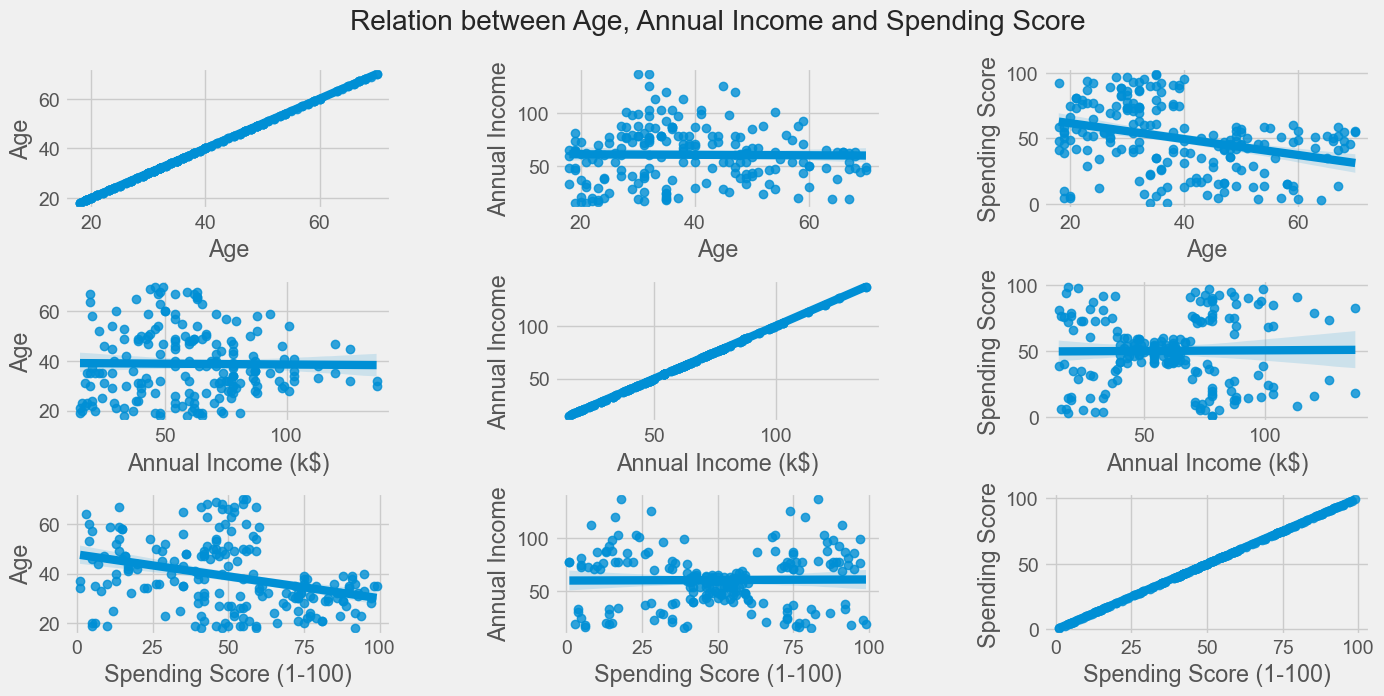

In [69]:
# Plotting Regression model for Age, Annual Income and Spending Score

plt.figure(figsize=(15,7))
n = 0

for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    for y in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3, 3, n)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(x = x, y = y, data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y)  
        plt.title('Relation between Age, Annual Income and Spending Score\n' if n == 2 else '')
plt.show()

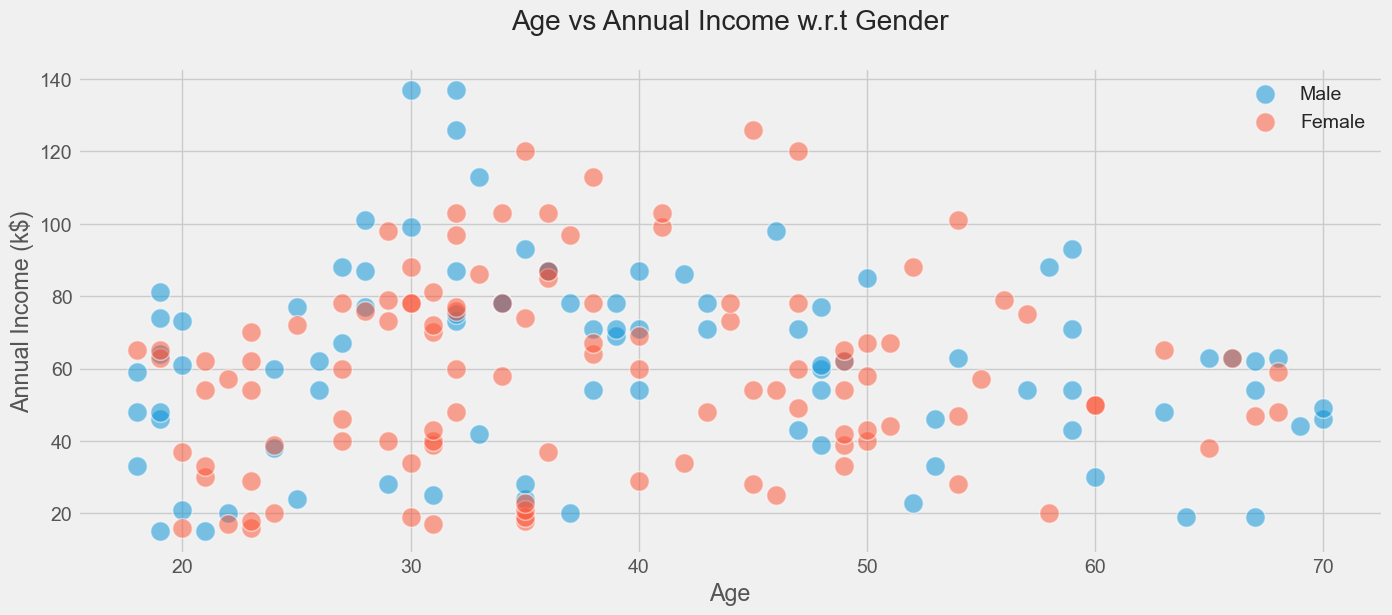

In [66]:
# Plotting scatter plot between Age and Annual Income

plt.figure(figsize=(15, 6))

for gender in ['Male', 'Female']:
    sns.scatterplot(x = 'Age', y = 'Annual Income (k$)', data = df[df['Gender'] == gender], 
                    s = 200, alpha = 0.5, label = gender)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income w.r.t Gender\n')
plt.legend()
plt.show()

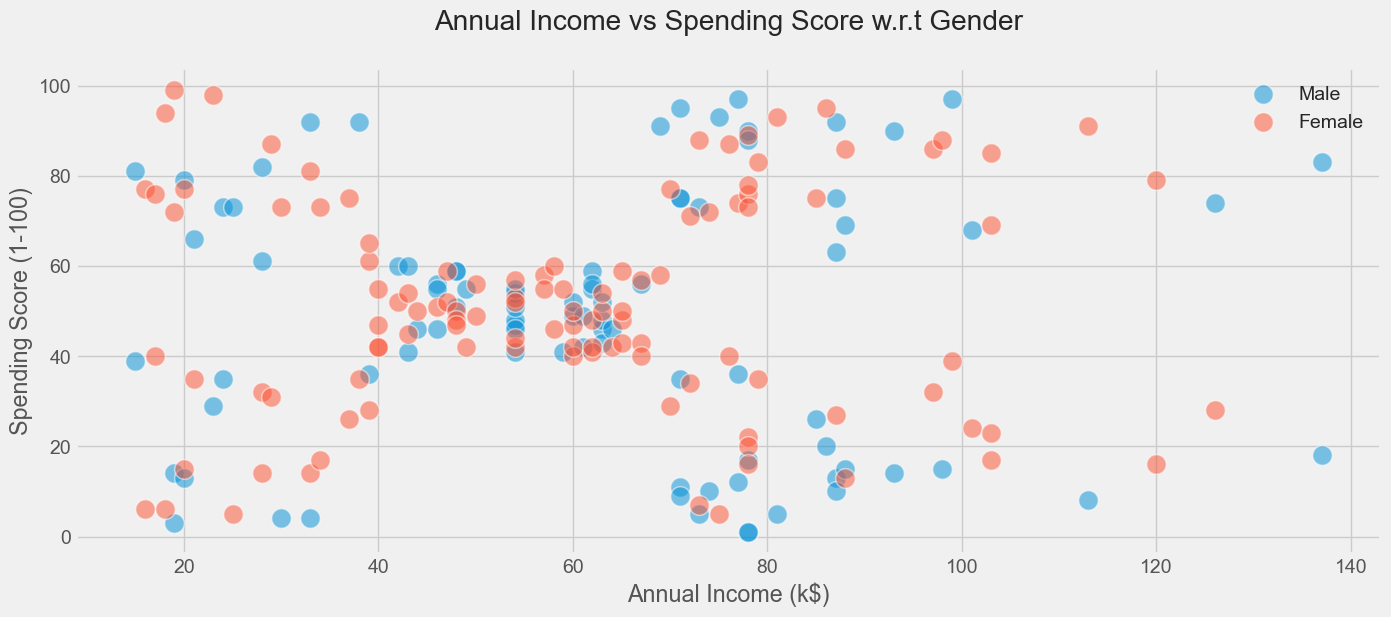

In [68]:
# Plotting scatter plot between Annual Income and Spending Score

plt.figure(figsize=(15, 6))

for gender in ['Male', 'Female']:
    sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df[df['Gender'] == gender], 
                    s = 200, alpha = 0.5, label = gender)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score w.r.t Gender\n')
plt.legend()
plt.show()

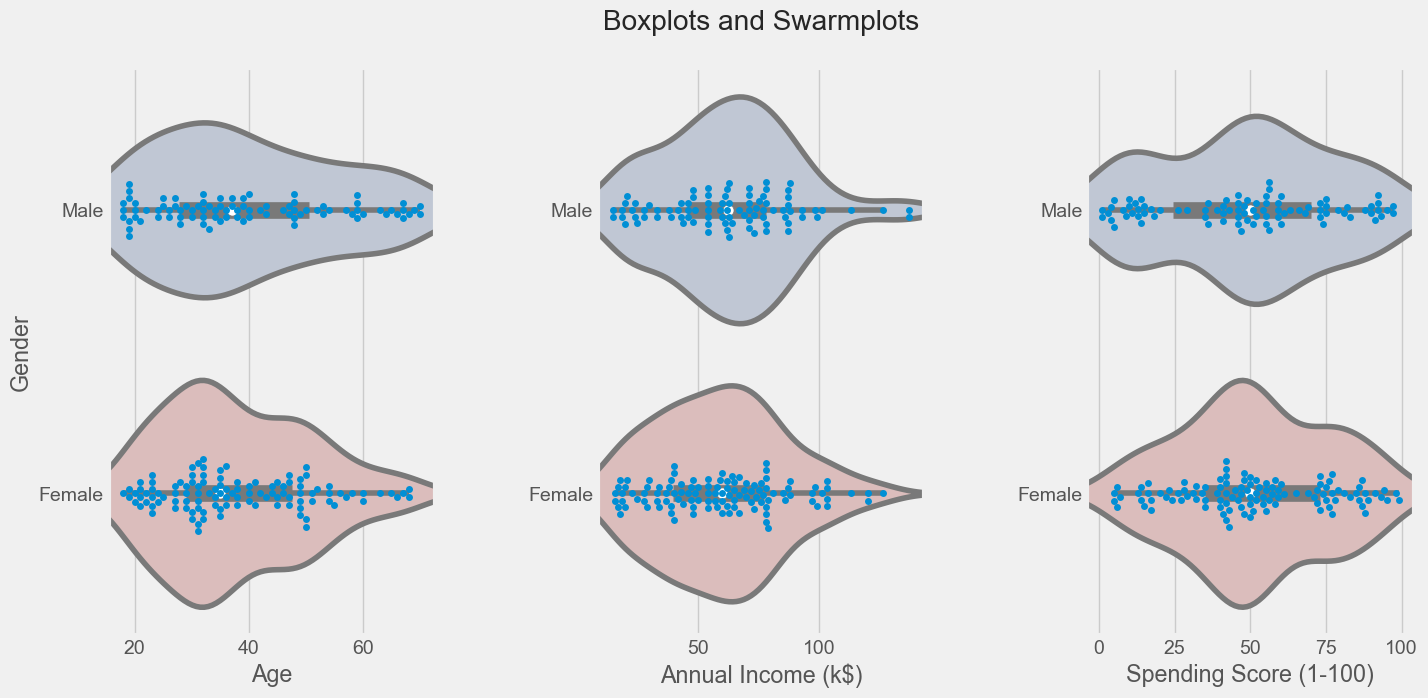

In [80]:
# Distribution of values in Age, Annual Income and Spending Score w.r.t Gender

plt.figure(figsize=(15, 7))
n = 0

for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)' ]:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.violinplot(x = cols, y = 'Gender', data = df, palette = 'vlag')
    sns.swarmplot(x = cols, y = 'Gender',data =df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots and Swarmplots\n' if n == 2 else '')
plt.show()